In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split


In [8]:
#data = pd.read_csv(
#    "/content/sample_data/mnist_train_small.csv",
#    header = None)

data=tf.keras.datasets.fashion_mnist.load_data()

#x=data.drop(columns=0).values
#y=data[0]
#x=x/255.0
#y=y.values.reshape(-1,1)

(x_train,y_train),(x_test,y_test) = data

x_train = x_train/255.0
x_test = x_test/255.0

In [53]:
x_train.shape

(60000, 28, 28)

In [3]:
nom_clases = ["polos",
              "pantalon",
              "sudadera",
              "vestidos",
              "abrigo",
              "sandalia",
              "camisa",
              "zapatilla",
              "bolsos",
              "botas"]

In [29]:
#x_train,x_test,y_train,y_test = train_test_split(x, y,
#                                                 test_size=0.333,
#                                                 random_state=111)

In [9]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer="sgd",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
epochs=20
history = model.fit(x_train, y_train,
                     validation_data=(x_test,y_test),
                     epochs=epochs)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7469 - accuracy: 0.7572 - val_loss: 0.5774 - val_accuracy: 0.8035
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5180 - accuracy: 0.8239 - val_loss: 0.5100 - val_accuracy: 0.8242
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4726 - accuracy: 0.8365 - val_loss: 0.4828 - val_accuracy: 0.8295
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4476 - accuracy: 0.8457 - val_loss: 0.4683 - val_accuracy: 0.8350
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4301 - accuracy: 0.8508 - val_loss: 0.4512 - val_accuracy: 0.8415
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4163 - accuracy: 0.8558 - val_loss: 0.4472 - val_accuracy: 0.8416
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4053 - accuracy: 0.8600 - val_loss: 0.4325 - val_accuracy:

In [13]:
modelo_probabilidad = tf.keras.Sequential([model,
                                           tf.keras.layers.Softmax()])
predictions = modelo_probabilidad.predict(x_test)

In [20]:
print(list(map('{:.3f}'.format,predictions[2])))
print(nom_clases[np.argmax(predictions[2])])

['0.000', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']
pantalon


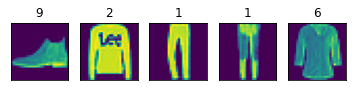

In [21]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

plot_example(x_test, y_test)

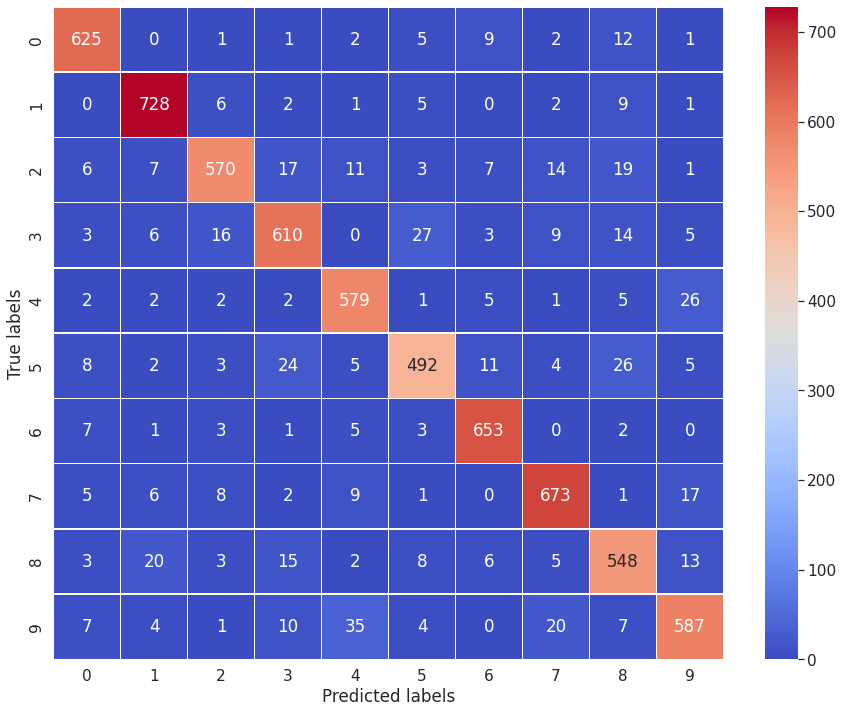

In [47]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_test, list(map(np.argmax,predictions)))
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,12)) 
sns.set(font_scale=1.4)
ax=sns.heatmap(cf, annot=True,linewidths=.5,fmt='g',cmap = "coolwarm")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax